In [46]:
Lamda = (0.0054-0.0033)*2*np.pi *1e-3
nbar = 10
t = 347

1-np.exp(-(Lamda*nbar*t)**2/2)

0.0010476101441091457

In [47]:
Lamda

1.3194689145077134e-05

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.stats import norm

n_values = np.arange(0, 100, 1)  # Range of photon numbers to calculate


# Function to calculate the Poisson distribution
def poisson_distribution(nbar, n):
    return (nbar ** n * np.exp(-nbar)) / factorial(n)


# Explicit definition of Gaussian approximation
def gaussian_approximation(nbar, n):
    sigma = np.sqrt(nbar)  # Standard deviation is sqrt(nbar)
    prefactor = 1 / (np.sqrt(2 * np.pi * sigma**2))  # 1 / sqrt(2*pi*sigma^2)
    exponent = np.exp(-(n - nbar)**2 / (2 * sigma**2))  # Exponential factor
    return prefactor * exponent


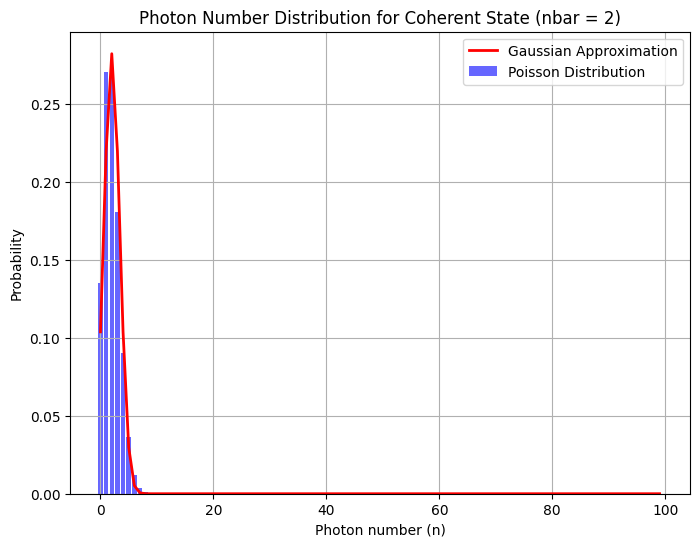

In [25]:
nbar = 2

# Calculate Poisson distribution and Gaussian approximation
poisson_vals = poisson_distribution(nbar, n_values)
gaussian_vals = gaussian_approximation(nbar, n_values)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(n_values, poisson_vals, width=0.8, label='Poisson Distribution', color='blue', alpha=0.6)
plt.plot(n_values, gaussian_vals, 'r-', label='Gaussian Approximation', linewidth=2)

# Labels and legend
plt.xlabel('Photon number (n)')
plt.ylabel('Probability')
plt.title(f'Photon Number Distribution for Coherent State (nbar = {nbar})')
plt.legend()
plt.grid(True)
plt.show()


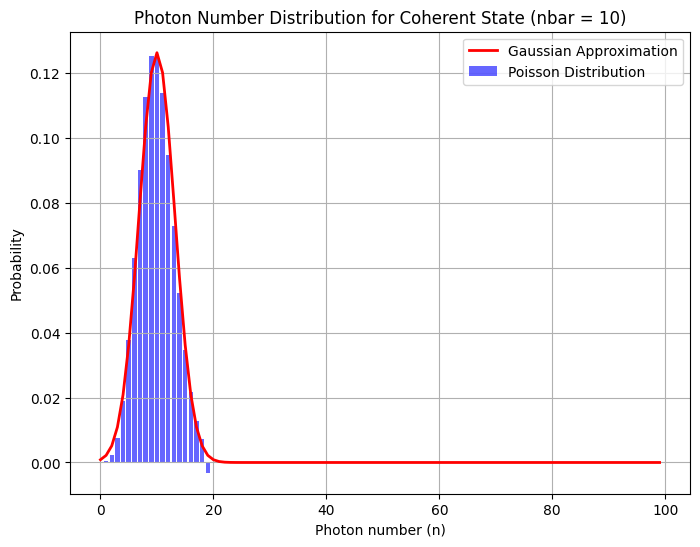

In [26]:
nbar = 10

# Calculate Poisson distribution and Gaussian approximation
poisson_vals = poisson_distribution(nbar, n_values)
gaussian_vals = gaussian_approximation(nbar, n_values)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(n_values, poisson_vals, width=0.8, label='Poisson Distribution', color='blue', alpha=0.6)
plt.plot(n_values, gaussian_vals, 'r-', label='Gaussian Approximation', linewidth=2)

# Labels and legend
plt.xlabel('Photon number (n)')
plt.ylabel('Probability')
plt.title(f'Photon Number Distribution for Coherent State (nbar = {nbar})')
plt.legend()
plt.grid(True)
plt.show()


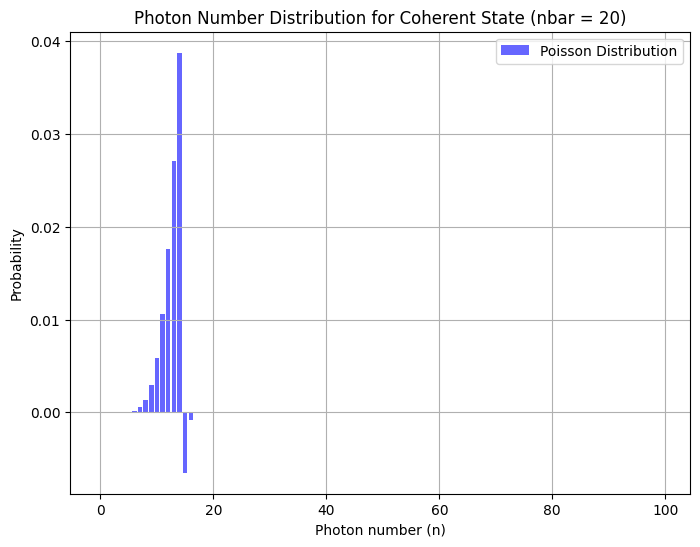

In [38]:
nbar = 20

# Calculate Poisson distribution and Gaussian approximation
poisson_vals = poisson_distribution(nbar, n_values)
gaussian_vals = gaussian_approximation(nbar, n_values)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(n_values, poisson_vals, width=0.8, label='Poisson Distribution', color='blue', alpha=0.6)
# plt.plot(n_values, gaussian_vals, 'r-', label='Gaussian Approximation', linewidth=2)

# Labels and legend
plt.xlabel('Photon number (n)')
plt.ylabel('Probability')
plt.title(f'Photon Number Distribution for Coherent State (nbar = {nbar})')
plt.legend()
plt.grid(True)
plt.show()


Numerical coherence magnitude: 0.4993726983144516
Theoretical coherence magnitude: 0.49937539046229046


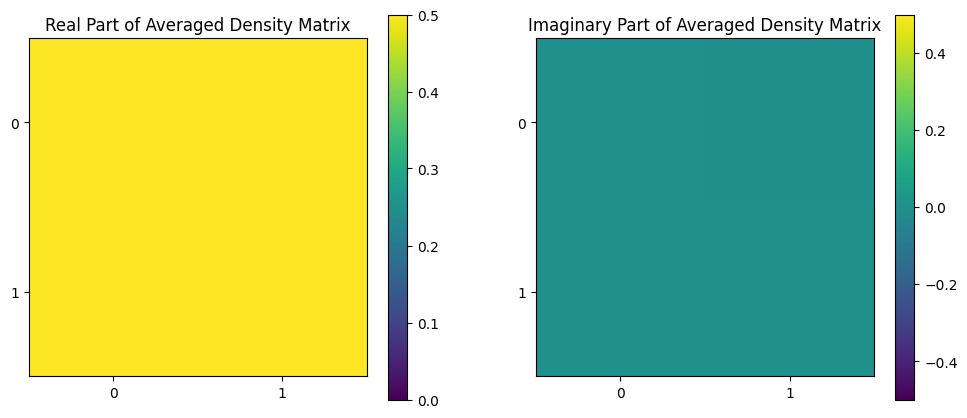

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
sigma = 0.05  # Standard deviation of the phase (variance = sigma^2)
num_samples = 100000  # Number of samples to average over

# Define the initial qubit state |ψ⟩ = (|0⟩ + |1⟩)/√2
initial_state = np.array([1/np.sqrt(2), 1/np.sqrt(2)], dtype=complex)

# Initialize the density matrix accumulator
rho_accumulated = np.zeros((2, 2), dtype=complex)

# Sampling random phases and applying the phase gate
for _ in range(num_samples):
    # Sample a random phase φ from a normal distribution with mean 0 and variance σ^2
    phi = np.random.normal(loc=0.0, scale=sigma)
    
    # Construct the phase gate U = diag(1, e^{iφ})
    U = np.array([[1, 0],
                  [0, np.exp(1j * phi)]], dtype=complex)
    
    # Apply the phase gate to the initial state
    psi_phi = U @ initial_state
    
    # Compute the density matrix ρ_φ = |ψ_φ⟩⟨ψ_φ|
    rho_phi = np.outer(psi_phi, np.conj(psi_phi))
    
    # Accumulate the density matrices
    rho_accumulated += rho_phi

# Compute the averaged density matrix
rho_averaged = rho_accumulated / num_samples

# Extract the coherence term (off-diagonal element)
coherence = rho_averaged[0, 1]

# Calculate the magnitude of the coherence term
coherence_magnitude = np.abs(coherence)

# Theoretical coherence decay factor
theoretical_decay = np.exp(-sigma**2 / 2)

# Display the results
print(f"Numerical coherence magnitude: {coherence_magnitude}")
print(f"Theoretical coherence magnitude: {0.5*theoretical_decay}")

# Plotting the real and imaginary parts of the averaged density matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Real part
im = ax[0].imshow(rho_averaged.real, cmap='viridis', vmin=0, vmax=0.5)
ax[0].set_title('Real Part of Averaged Density Matrix')
ax[0].set_xticks([0, 1])
ax[0].set_yticks([0, 1])
fig.colorbar(im, ax=ax[0])

# Imaginary part
im = ax[1].imshow(rho_averaged.imag, cmap='viridis', vmin=-0.5, vmax=0.5)
ax[1].set_title('Imaginary Part of Averaged Density Matrix')
ax[1].set_xticks([0, 1])
ax[1].set_yticks([0, 1])
fig.colorbar(im, ax=ax[1])

plt.show()
